# Problem 1 (Two Guards Enigma)

A prisoner, sentenced to death, faces the guard that shall impose his sentence. The guard considered himself very even and stated to the prisoner that he would have one last chance of surviving depending on his intelligence, the guard then showed him two doors with one guard for each door, behind one door he will be safe, behind the other he will still face his sentence. To make the problem reliant on the intelligence of the prisoner and not only luck, one more detail is added to the problem, one of the guards always lies and the other always tells the truth and you can only ask one question that should be directed to only of them.

## Problem 1.1 What question would you ask to get to the safe door?
## Problem 1.2 What is the probability distribution of every possible situation?
## Problem 1.3 Build the Quantum Circuit that models and solves the guard enigma.

# Solution

## Solution 1.1

Let 0 be the guard that always tells the truth and be 1 the other guard, let 0 be one of the doors and 1 be the other. Suppose that the prisoner asks a question such that the answer will be one of the doors, as one guard always tells the truth and the other always lies, their answer will always be opposite, no matter the question he asks.

If he simply asks "Which door is the safe door", he will still be left with only a guess. If he asks to one of the guards, "Which door would the other guard tell me that leads to safety, if I asked him instead?" the truth guard would point to the wrong door as this is what the liar guard would say, on the other hand, the liar guard would point to the wrong door as this is the opposite of what the truthful guard would say, so no matter which door the guard points to, he has to pick the other one and he will be safe, solving the enigma.

## Solution 1.2

Let's model the possible states of this enigma using a table of truth. If we live in a world where the door 1 leads to safety, then it follows that

|Guard|Answer|Safety Door|
|-----|------|-----------|
|    0|     0|          1|
|    1|     0|          1|

Perhaps, if we live in a world where the door 0 leads to safety, then

|Guard|Answer|Safety Door|
|-----|------|-----------|
|    0|     1|          0|
|    1|     1|          0|

Now, consider we live in a superposition of the worlds where door 0 and door 1 are the safe door, our system could be any of the following states

|Guard|Answer|Safety Door|
|-----|------|-----------|
|    0|     0|          1|
|    0|     1|          0|
|    1|     0|          1|
|    1|     1|          0|

As there is information about the probabilities of any of thoose states being more probable, assume they are all equally probable with $\frac{1}{4}$ or $25\%$ chance of happening.

## Solution 1.3

As a convention let's start our circuit with 3 qubits in the state $\ket{00}\ket{0}$ to model respectively the guard, the answer and the door. Also, for this and the following exercises let's assume that the right most bit is the first to be indexed with 0 and the index increments whe walking to the left.

As we don't know which guard we are asking the question to we could apply a Haddamard gate to it's qubit and the same goes to the door qubit as the door superposition is mentioned. However, looking at the truth table built on solution 1.2, it seems reasonable that we apply the Haddamard gate to the answer qubit, since the states $\{00, 01, 10, 11\}$ should happen with equal probabilities and then change the door qubit acording to the answer as we noted in solution 1.1 they are opposites.

\begin{align*}
\ket{00}\ket{0} &\stackrel{H^{\oplus2}}{\rightarrow} \ket{++}\ket{0}\\
&= \frac{1}{\sqrt{2}}(\ket{0} + \ket{1})\frac{1}{\sqrt{2}}(\ket{0} + \ket{1})\ket{0}\\
&= \frac{1}{2}(\ket{00}\ket{0} + \ket{01}\ket{0} + \ket{10}\ket{0} + \ket{11}\ket{0})\\
\end{align*}

As already mentioned, the guard's answer and the door should be opposites, which is described by a $CNOT$ gate. Looking at the system qubits and the truth table from solution 1.2, it's possible to check that this $CNOT$ should fire only if the control qubit is 0, but that operation is not built-in for $qiskit$. One way to solve this is by flipping the middle qubit with the $X$ gate, applying $CNOT$ and then applying $X$.


\begin{align*}
\frac{1}{2}(\ket{00}\ket{0} + \ket{01}\ket{0} + \ket{10}\ket{0} + \ket{11}\ket{0}) &\stackrel{X_1}{\rightarrow} \frac{1}{2}(\ket{01}\ket{0} + \ket{00}\ket{0} + \ket{11}\ket{0} + \ket{10}\ket{0})\\
&\stackrel{CNOT_{1,0}}{\rightarrow} \frac{1}{2}(\ket{01}\ket{1} + \ket{00}\ket{0} + \ket{11}\ket{1} + \ket{10}\ket{0})\\
&\stackrel{X_1}{\rightarrow} \frac{1}{2}(\ket{00}\ket{1} + \ket{01}\ket{0} + \ket{10}\ket{1} + \ket{11}\ket{0})\\
\end{align*}

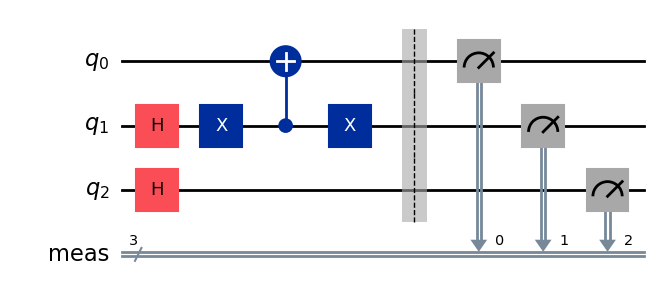

In [ ]:
import qiskit


circuit = qiskit.QuantumCircuit(3)

circuit.h([1, 2])

circuit.x(1)
circuit.cx(1, 0)
circuit.x(1)

circuit.measure_all()

circuit.draw("mpl")